# Stacjonarność

In [ ]:
import numpy as np
import pandas as pd

from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
%matplotlib inline

Chcemy umieć modelować szeregi aby dobrze odwzorować ich zachowanie i mieć  wiarygodne przewidywania wartości tego szeregu w przyszłości. Większość modeli które istnieją dotyczą szeregów stacjonarnych, więc na początku nauczymy się badać stacjonarność szeregu

**Stacjonarność w szerszym sensie**

- stała w czasie wartość oczekiwana $\mathbb{E}(y_t) = \mu,$
- stała w czasie wariancja $\text{Var}(y_t) = \sigma^2 < \infty,$
- kowariancja zależna od przesunięcia $h$ (nie od czasu) $\text{Cov}(y_t, y_{t+h}) = \mathbb{E}(y_t - \mu)(y_{t+h} - \mu) = \lambda_h.$


W celach praktycznych aby sprawdzić stacjonarność szeregu możemy użyć:
1. technik wizualizacyjnych
    - **średniej ruchomej**,
    - **ruchomej wariancji**
2. **testu Dickeya-Fullera** - jeden z testów statystycznych weryfikujących stacjonarność szeregu, gdzie hipoteza zerowa testu Dickeya-Fullera zakłada, że szereg jest niestacjonarny.

## Zadanie - biały szum
Wygeneruj 100-elementowy *biały szum*, a następnie:
- narysuj wykres tego szeregu,
- nanieść na powyższy wykres,
    - wykres średniej ruchomej o długości 12 (`pandas.Series.rolling`),
    - wykres ruchomej wariancji o długości 12 (`pandas.Series.rolling`),
- narysuj wykres autokorelacji tego szeregu
- wykonaj test Dickeya-Fullera na poziomie istotności 0.05.

**Biały szum** (ang. **white noise**):
$$
    y_t = \varepsilon_t,
$$
gdzie $\varepsilon_t \sim \mathcal{N}(0, \sigma)$.


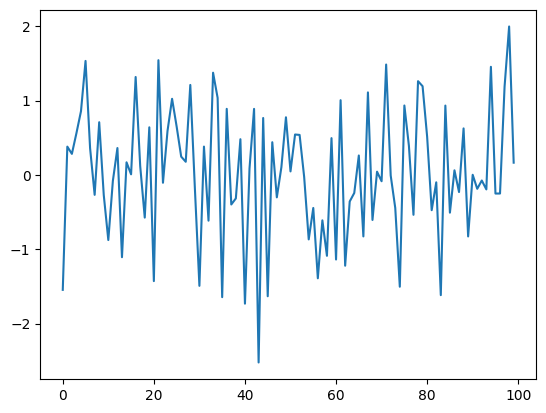

In [ ]:
sigma = 1

white_noise = np.random.normal(0, sigma, 100)
plt.plot(white_noise)

In [ ]:
white_noise = pd.Series(white_noise)

wn_rolling_mean = white_noise.rolling(12).mean()
wn_rolling_var = white_noise.rolling(12).var()

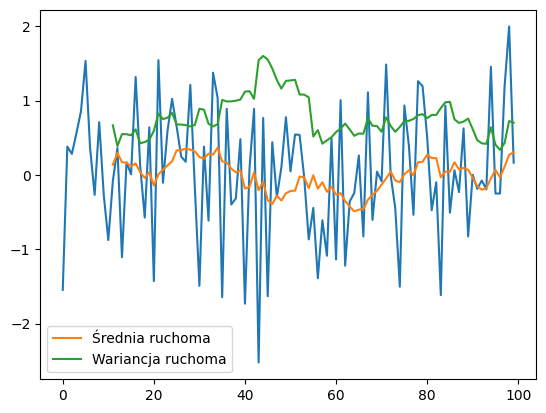

In [ ]:
plt.plot(white_noise)
plt.plot(wn_rolling_mean, label='Średnia ruchoma')
plt.plot(wn_rolling_var, label='Wariancja ruchoma')
plt.legend()
plt.show()
#średnia ruchoma i wariancja ruchoma w miarę stabilne, mamy spełnione założenia o stałej średniej i wariancji w szeregu

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

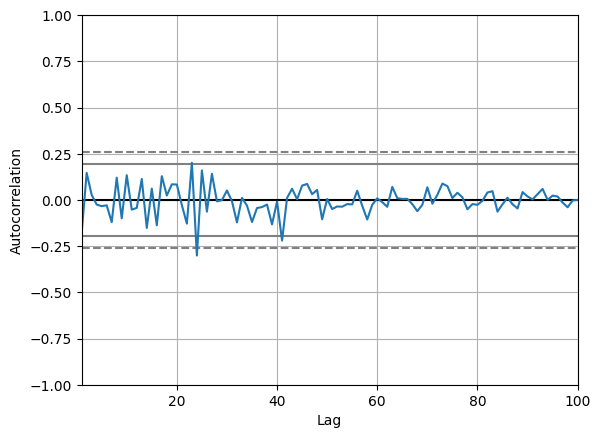

In [ ]:
pd.plotting.autocorrelation_plot(white_noise)
#szerego ma wszystkie zerowe autokorelacje, nie ma zależności między poszczególnymi obserwacjami

In [ ]:
# H0: szereg jest niestacjonarny
df_test = adfuller(white_noise)

#z tym testem trzeba uważać bo wychwytuje tylko niektóre typy niestacjonarności. Jeśli test nie odrzuca H_0 to szereg nie jest stacjonarny, ale mogą być takie szeregi niestacjonarne gdzie test będzie odrzucał H_0

In [ ]:
print("p-value testu Dickeya-Fullera: {}".format(df_test[1]))

if df_test[1] < 0.05:
    print('Szereg jest stacjonarny')
else:
    print('Szereg jest niestacjonarny')

p-value testu Dickeya-Fullera: 3.2141166526564885e-22
Szereg jest stacjonarny


**Wniosek**: Biały szum jest przykładem szeregu **STACJONARNEGO**.

## Zadanie - błądzenie losowe
Wygeneruj 100-elementowy szereg czasowy typu *błądzenie losowe*, a następnie:
- narysuj wykres tego szeregu,
- nanieść na powyższy wykres,
    - wykres średniej ruchomej o długości 12,
    - wykres ruchomej wariancji o długości 12,
- narysuj wykres autokorelacji tego szeregu
- wykonaj test Dickeya-Fullera na poziomie istotności 0.05.

**Błądzenie losowe** (ang.*random walk*):
$$
y_t = y_{t-1} + \varepsilon_t = y_0 + \sum_{i=1}^{t}\varepsilon_i,
$$
gdzie $y_0 = a = \text{const}$ i $\varepsilon_t \sim \mathcal{N}(0, \sigma)$.

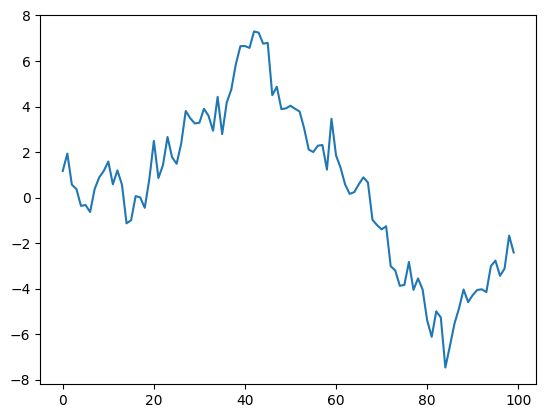

In [ ]:
# zakladam, ze y0=0
e = np.random.normal(0, 1, 100)
random_walk = np.cumsum(e)

plt.plot(random_walk)

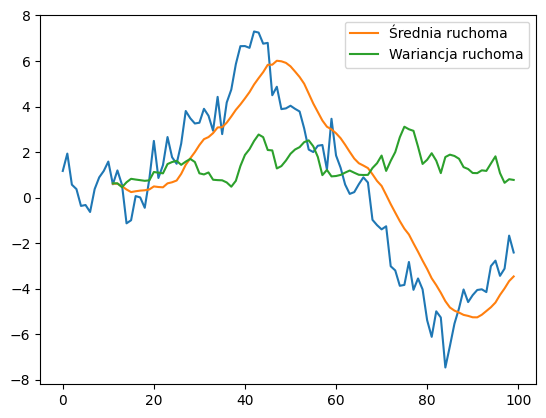

In [ ]:
random_walk = pd.Series(random_walk)

rw_rolling_mean = random_walk.rolling(12).mean()
rw_rolling_var = random_walk.rolling(12).var()

plt.plot(random_walk)
plt.plot(rw_rolling_mean, label='Średnia ruchoma')
plt.plot(rw_rolling_var, label='Wariancja ruchoma')
plt.legend()
plt.show()
#ciężko mówić o równej średniej, co do wariancji z wykresu nie można jednoznacznie wyczytać

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

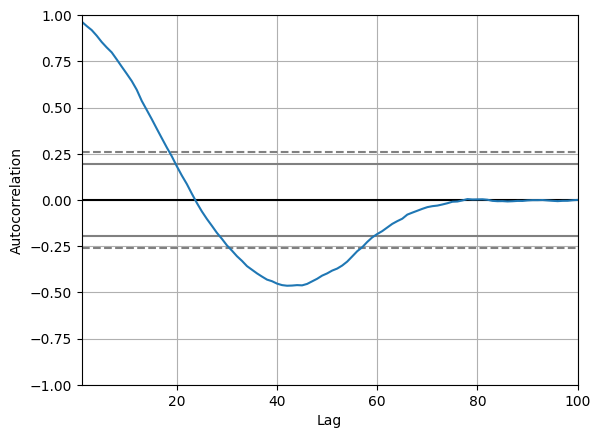

In [ ]:
pd.plotting.autocorrelation_plot(random_walk)
#ewidentnie mamy do czynienia z niestacjonarnością

In [ ]:
df_test = adfuller(random_walk)

print("p-value testu Dickeya-Fullera: {}".format(df_test[1]))

if df_test[1] < 0.05:
    print('Szereg jest stacjonarny')
else:
    print('Szereg jest niestacjonarny')


p-value testu Dickeya-Fullera: 0.706453216969682
Szereg jest niestacjonarny


## Zadanie
Napisz funkcję `check_time_series_stationary`, która:
- narysuje wykres tego szeregu,
- naniesie na powyższy wykres,
    - wykres średniej ruchomej zadanej długości,
    - wykres ruchomej wariancji zadanej długości,
- narysuje wykres autokorelacji tego szeregu,
- wykona test Dickeya-Fullera, zwróci wartość statystyki testowej oraz $p$-wartość.

In [ ]:
#funkcja wyrzuca wartość statystyki i p-wartość testu Dickeya-Fullera, rysuje wykreś średniej ruchomej i wariancji ruchomej i wykres autokorelacji
def check_time_series_stationary(y, rolling_len = 12):

    y = pd.Series(y)

    df_test = adfuller(y)

    if df_test[1] < 0.05:
        print('Szereg jest stacjonarny')
    else:
        print('Szereg jest niestacjonarny')

    print("{0:^32s}".format("Dickey-Fuller Test"))
    print("-"*32+"\n")

    print("{0:<20s}: {1:>10.4f}".format('Test Statistic', df_test[0]))
    print("{0:<20s}: {1:>10.4f}".format('p-value', df_test[1]))
    print("-"*32+"\n")

    rolling_mean = y.rolling(rolling_len).mean()
    rolling_var = y.rolling(rolling_len).var()

    plt.plot(y)
    plt.plot(rolling_mean, label="Rolling mean")
    plt.plot(rolling_var, label="Rolling var")
    plt.legend()
    plt.show()

    print("{0:^32s}".format("Autocorrelation plot"))
    print("-"*32+"\n")
    pd.plotting.autocorrelation_plot(y)
    plt.show()

Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -1.1214
p-value             :     0.7065
--------------------------------



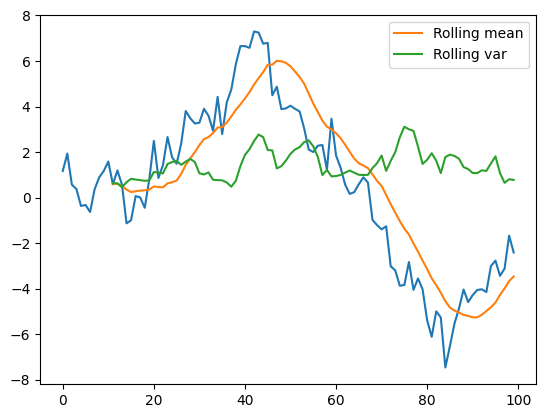

      Autocorrelation plot      
--------------------------------



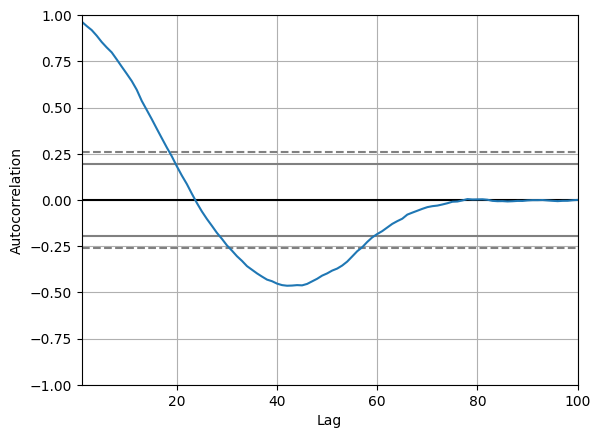

In [ ]:
check_time_series_stationary(random_walk)

## ***Zadanie - parametr $\varphi$
Idea **testu Dickey-Fullera** opiera się na modelu autokorelacji pierwszego rzędu następującej
postaci:
$$ y_t = \varphi y_{t-1} + \varepsilon_t, $$
gdzie $\varphi$ - parametr modelu autoregresji i $\varepsilon_t$ - składnik losowy o własnościach białego szumu.

Wygeneruj szeregi czasowe $y_t$ dla astępujnących wartości $\varphi \in \{0.1, 0.25, 0.5, 0.75, 0.9\}$, a następnie zbadaj ich stacjonarność.

            Rho=0.1             
--------------------------------

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -9.5257
p-value             :     0.0000
--------------------------------



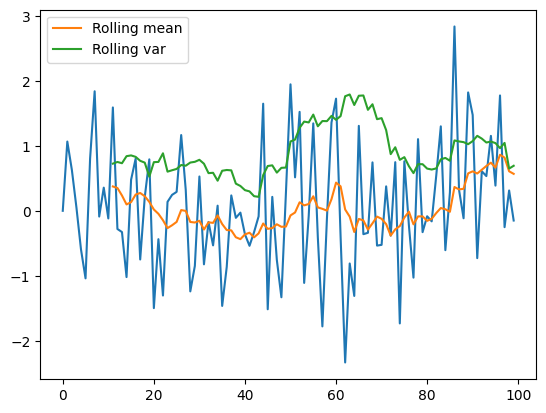

      Autocorrelation plot      
--------------------------------



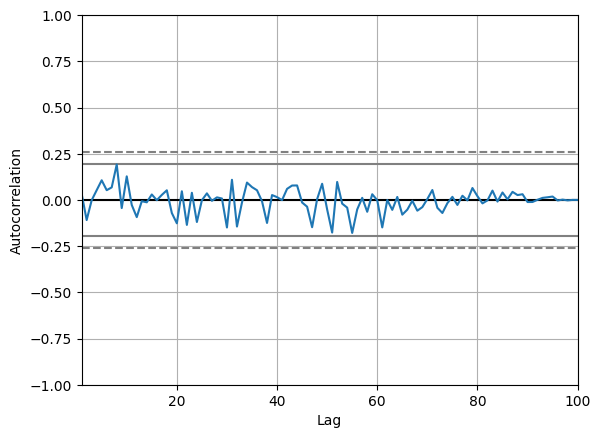

            Rho=0.25            
--------------------------------

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -8.2999
p-value             :     0.0000
--------------------------------



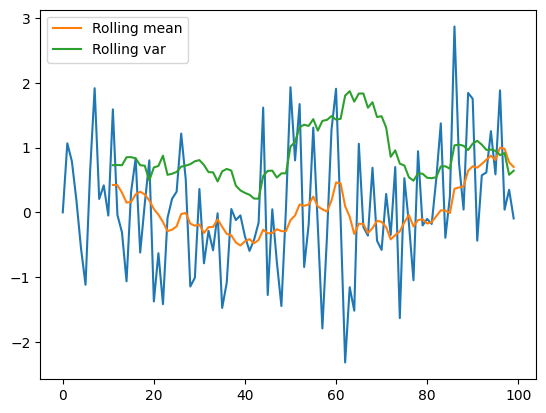

      Autocorrelation plot      
--------------------------------



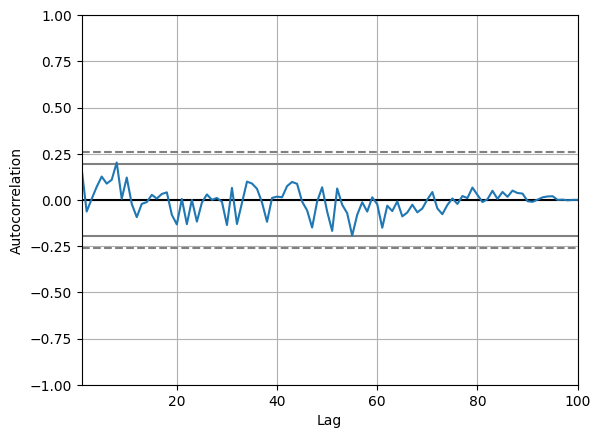

            Rho=0.5             
--------------------------------

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -6.2994
p-value             :     0.0000
--------------------------------



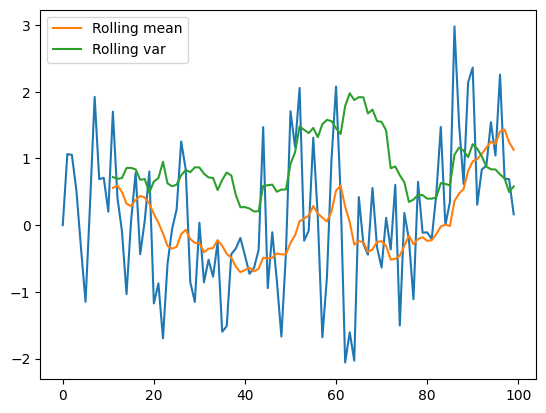

      Autocorrelation plot      
--------------------------------



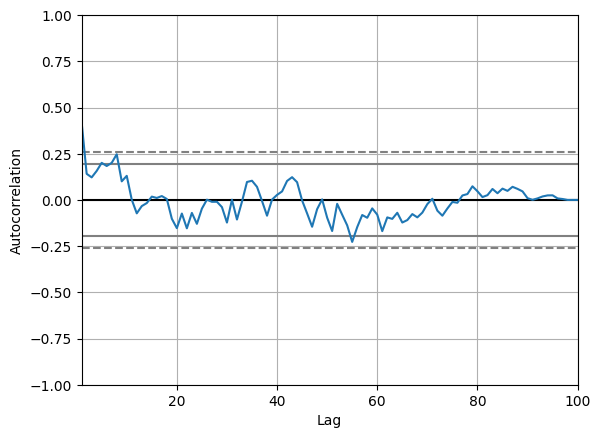

            Rho=0.75            
--------------------------------

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -3.9132
p-value             :     0.0019
--------------------------------



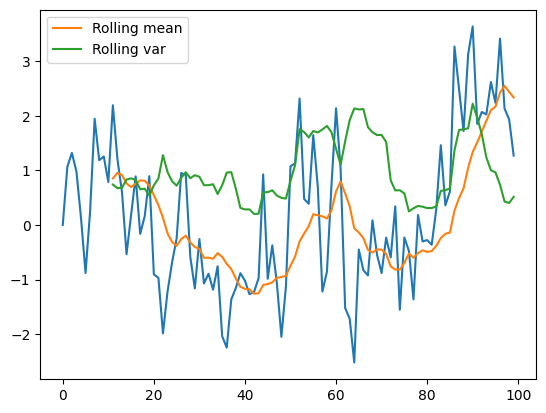

      Autocorrelation plot      
--------------------------------



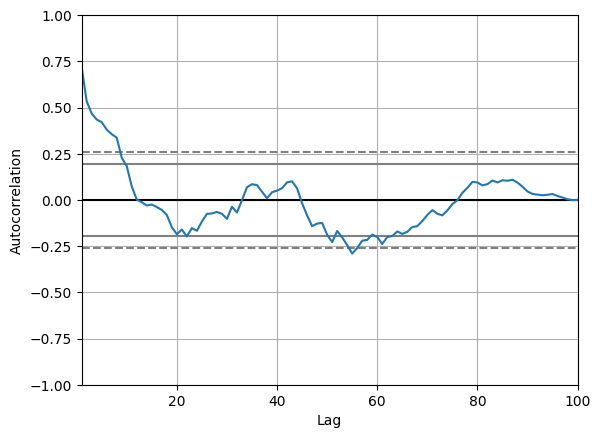

            Rho=0.9             
--------------------------------

Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -2.0088
p-value             :     0.2827
--------------------------------



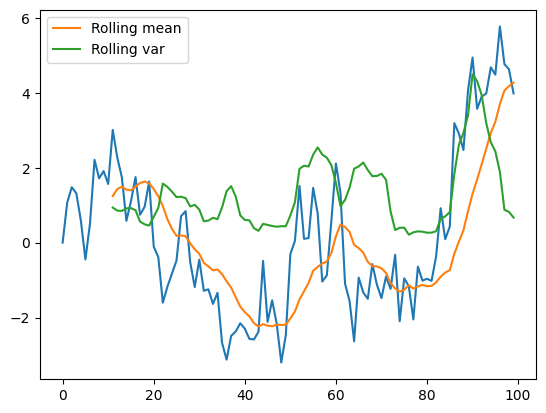

      Autocorrelation plot      
--------------------------------



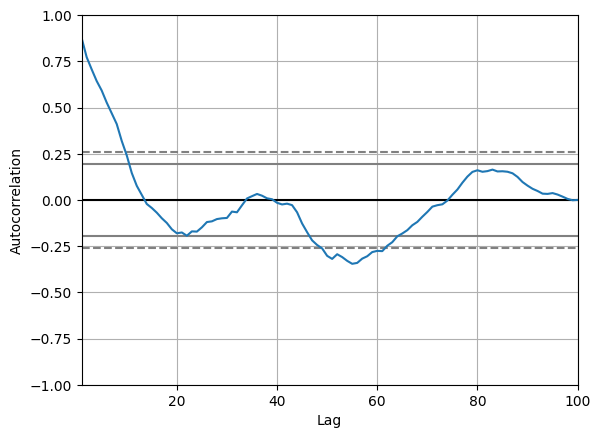

In [ ]:
n = 100
e = np.random.normal(0, 1, 100)

for q in (0.1, 0.25, 0.5, 0.75, 0.9):
    print("{0:^32s}".format("Rho=" + str(q)))
    print("-"*32+"\n")
    y = np.zeros(n)
    for i in range(1, n):
        y[i] = q * y[i-1] + e[i]
    check_time_series_stationary(y)

#szeregi są staconarne, choć im bliżej parametru phi = 1 szereg coraz bardziej zaczyna przypominać szereg niestacjonarny (dla 0.9 już testy i wykresy mogą zacząć kalsyfikować szereg jako niestacjonarny)

## Zadanie - `a10`
Wczytaj dane `a10.csv` opisujące miesięczną sprzedaż leków przeciwcukrzycowych w Australii w latach 1992–2008, a następnie zbadaj stacjonarność tego szeregu.

In [ ]:
a10 = pd.read_csv('a10.csv', parse_dates=['date'], index_col='date')
a10.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :     3.1452
p-value             :     1.0000
--------------------------------



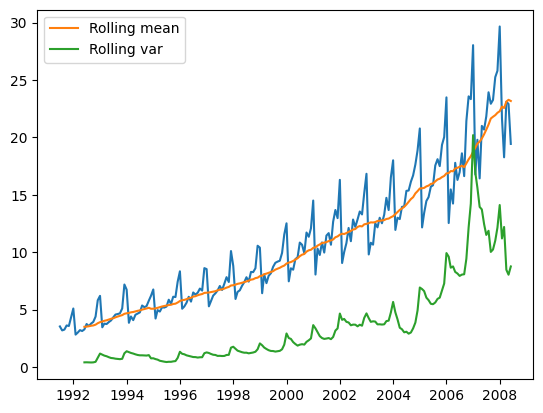

      Autocorrelation plot      
--------------------------------



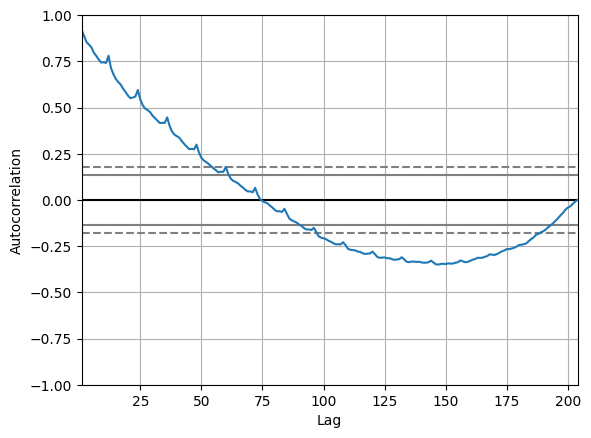

In [ ]:
check_time_series_stationary(a10.value) #ewidentnie brak stacjonarności

## Zadanie - `daily-total-female-births`
Wczytaj dane `daily-total-female-births.csv` przedstawiające całkowitą liczbę urodzeń kobiet zarejestrowanych w Kalifornii w USA w 1959 roku, a następnie zbadaj stacjonarność tego szeregu.

In [ ]:
daily_total_female_births = pd.read_csv('daily-total-female-births.csv',
                 parse_dates=['Date'], index_col='Date')
daily_total_female_births.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -4.8083
p-value             :     0.0001
--------------------------------



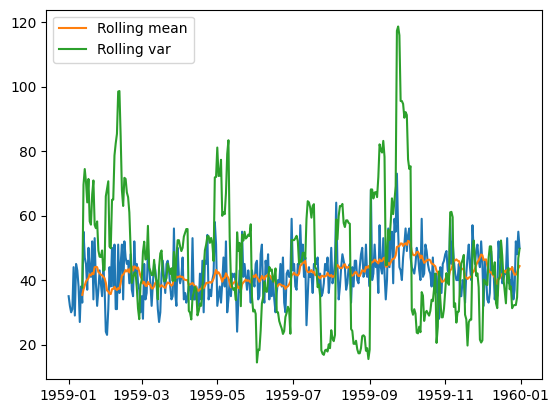

      Autocorrelation plot      
--------------------------------



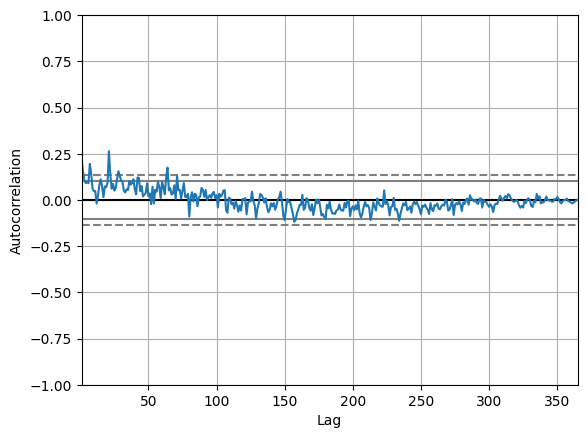

In [ ]:
check_time_series_stationary(daily_total_female_births.Births) # tu jest stacjonarność

## Zadanie - `southern`
Wczytaj dane `southern.csv`, a następnie zbadaj stacjonarność tego szeregu.

In [ ]:
southern = pd.read_csv('southern.csv', parse_dates=['Date'], index_col='Date')
southern.head()

,Southern
Date,
1955-01-01,-0.7
1955-02-01,1.3
1955-03-01,0.1
1955-04-01,-0.9
1955-05-01,0.8


Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -6.1813
p-value             :     0.0000
--------------------------------



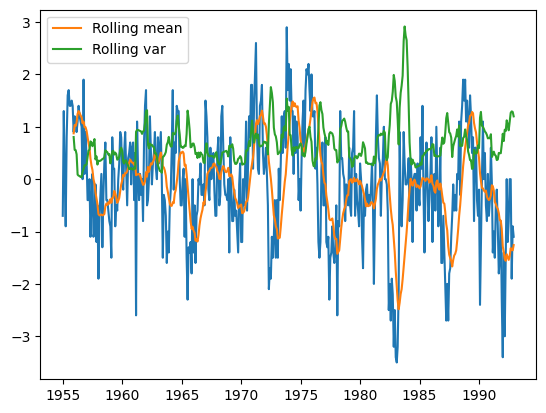

      Autocorrelation plot      
--------------------------------



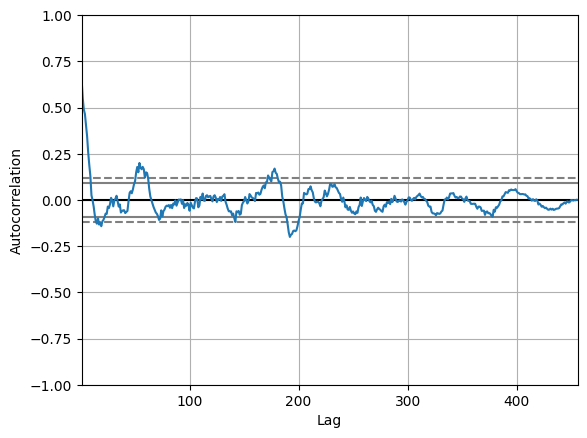

In [ ]:
check_time_series_stationary(southern.Southern) # tu też stacjonarność